In [ ]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import os


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set_style('white')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
movies_data = pd.read_csv('/content/drive/MyDrive/Datasets/datasets/movies.csv')

In [ ]:
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [ ]:
movies_data.shape

(4803, 24)

In [ ]:
movies_data.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [ ]:
selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)


['genres', 'keywords', 'tagline', 'cast', 'director']


In [ ]:
display (movies_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

None

In [ ]:
display (movies_data.isna().sum())

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [ ]:
display (movies_data[selected_features].head())

,genres,keywords,tagline,cast,director
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Enter the World of Pandora.,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"At the end of the world, the adventure begins.",Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A Plan No One Escapes,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,The Legend Ends,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"Lost in our world, found in another.",Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


In [ ]:
display (movies_data[selected_features].isna().sum())

genres       28
keywords    412
tagline     844
cast         43
director     30
dtype: int64

In [ ]:
for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')
display (movies_data.head())


,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [ ]:

combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']
display (combined_features)


0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object

In [ ]:
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
display (feature_vectors.shape)
print (feature_vectors)


(4803, 17318)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

In [ ]:
similarity = cosine_similarity(feature_vectors)
print  (similarity )


[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [ ]:
display(similarity.shape)

(4803, 4803)

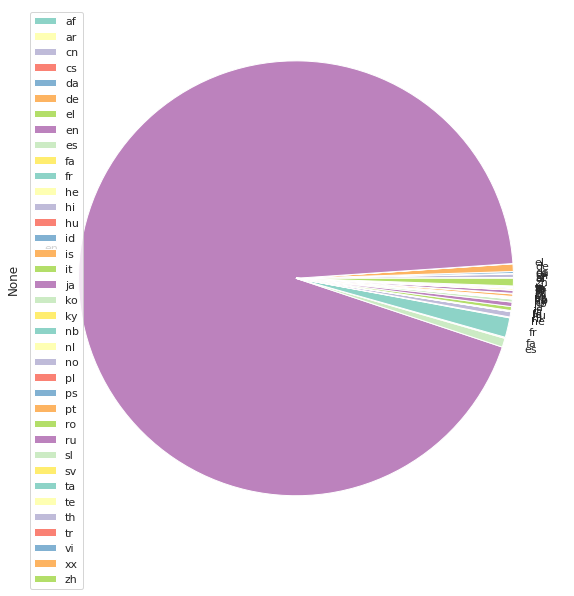

In [ ]:
movies_data.groupby('original_language').size().plot(kind='pie', legend=True,figsize=(10,10))

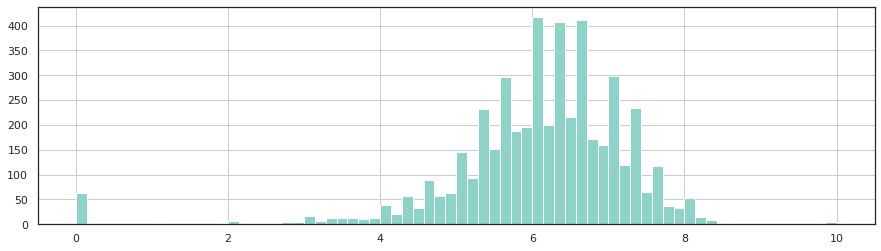

In [ ]:
# plot graph of 'num of ratings column'
plt.figure(figsize =(15, 4))
 
movies_data['vote_average'].hist(bins = 70)

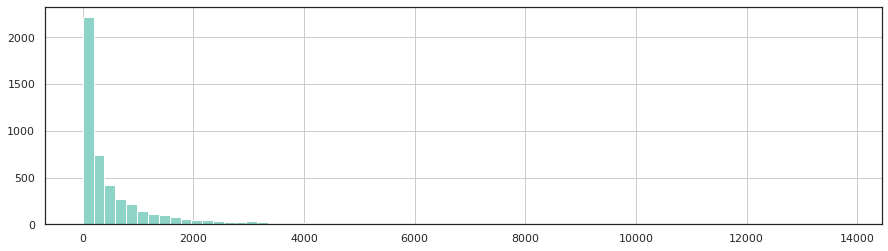

In [ ]:
plt.figure(figsize =(15, 4))
 
movies_data['vote_count'].hist(bins = 70)

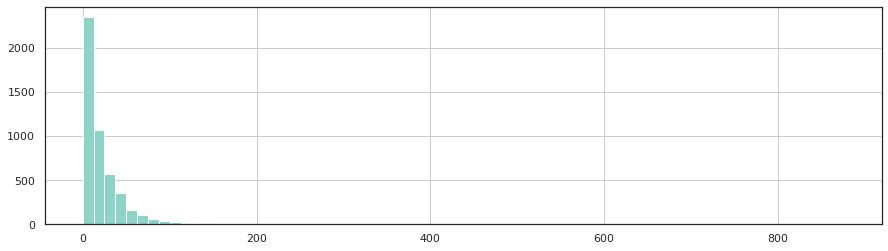

In [ ]:
plt.figure(figsize =(15, 4))
 
movies_data['popularity'].hist(bins = 70)

In [ ]:
movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name : avatar


In [ ]:
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)


['Avatar']


In [ ]:
close_match = find_close_match[0]
print(close_match)


Avatar


In [ ]:
index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]
print(index_of_the_movie)


0


In [ ]:
similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)


[(0, 1.0000000000000002), (1, 0.07219486822992491), (2, 0.03773299957717928), (3, 0.012520204623868908), (4, 0.10702574467235304), (5, 0.07786899789424222), (6, 0.008237143013608844), (7, 0.03613473061484884), (8, 0.02960930964063025), (9, 0.02628716743995174), (10, 0.09261074046755373), (11, 0.012717759249124133), (12, 0.027217360083100117), (13, 0.02956975252334751), (14, 0.06915925473724742), (15, 0.01955159449930903), (16, 0.03426340578061641), (17, 0.026036564614294145), (18, 0.057147592666724124), (19, 0.0389505953521203), (20, 0.03971480215415495), (21, 0.01201480380565613), (22, 0.03043869426198959), (23, 0.045926535588179496), (24, 0.04623989017965259), (25, 0.042849260959502256), (26, 0.07010711150614286), (27, 0.037198076232328854), (28, 0.04083909796927843), (29, 0.03858648330156397), (30, 0.07893753610792024), (31, 0.060555221380551486), (32, 0.030362745635800832), (33, 0.03591021470068869), (34, 0.0), (35, 0.03769674103474844), (36, 0.048910879509114234), (37, 0.085751739

In [ ]:
len(similarity_score)

4803

In [ ]:
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)


[(0, 1.0000000000000002), (3158, 0.24946766307532411), (2403, 0.24841462595906275), (94, 0.24505931974059814), (56, 0.2037806964828543), (47, 0.20115287461144912), (1053, 0.19702752258651426), (838, 0.18017023369312357), (3730, 0.17646241185313413), (4593, 0.1744884579741517), (239, 0.17441748680810654), (1531, 0.1682605817219649), (2696, 0.16503460259176522), (812, 0.1606230190749179), (643, 0.15644455512484967), (4401, 0.15468923545220403), (2198, 0.15217161971893786), (770, 0.15025726727753488), (1951, 0.14933372705282924), (2229, 0.14661801285492257), (1922, 0.1448197430191312), (206, 0.14226144606175545), (3208, 0.1401230206493547), (1759, 0.13899056016968867), (43, 0.1348209130228474), (1473, 0.13476547670086914), (278, 0.13291021545504), (158, 0.13252892131627672), (1650, 0.13024318650645417), (1275, 0.12602216304791153), (3439, 0.12480340331169382), (661, 0.12153002734138185), (3202, 0.12144749322246053), (4332, 0.12002556168548507), (3105, 0.11948466494212534), (775, 0.1184706

In [ ]:
movies_data.sort_values('vote_average', ascending = False).head(10)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
3519,3519,0,Comedy,NaN,89861,italy victorian england young woman,en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,...,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,,Stiff Upper Lips,10.0,1,Georgina Cates Peter Ustinov Prunella Scales S...,"[{'name': 'Jeremy Bolt', 'gender': 0, 'departm...",Gary Sinyor
4247,4247,1,Romance Comedy Drama,NaN,361505,,en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,...,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2,,[],
4045,4045,0,Comedy Drama Family,NaN,78373,small town texas,en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,...,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1,Breckin Meyer Peter Facinelli Eddie Mills Etha...,"[{'name': 'Tim McCanlies', 'gender': 2, 'depar...",Tim McCanlies
4662,4662,0,Comedy,NaN,40963,independent film,en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,...,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,,Little Big Top,10.0,1,Sid Haig Richard Riehle Mel England Jacob Zach...,[],
3992,3992,0,,NaN,346081,,en,Sardaarji,A ghost hunter uses bottles to capture trouble...,0.296981,...,0.0,[],Released,,Sardaarji,9.5,2,,"[{'name': 'Rohit Jugraj', 'gender': 0, 'depart...",Rohit Jugraj
2386,2386,0,Western Action Drama History,NaN,69848,war army battlefield chivalry,en,One Man's Hero,One Man's Hero tells the little-known story of...,0.910529,...,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,One man's hero is another man's traitor.,One Man's Hero,9.3,2,Tom Berenger Joaquim de Almeida Daniela Romo M...,"[{'name': 'Mary Jo Slater', 'gender': 1, 'depa...",Lance Hool
2970,2970,10500000,Drama Comedy,NaN,88641,,en,There Goes My Baby,A group of high school seniors meets in the su...,0.037073,...,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,,There Goes My Baby,8.5,2,Dermot Mulroney Ricky Schroder Kelli Williams ...,"[{'name': 'Lynn Stalmaster', 'gender': 2, 'dep...",Floyd Mutrux
1881,1881,25000000,Drama Crime,NaN,278,prison corruption police brutality prison cell...,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,...,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,Tim Robbins Morgan Freeman Bob Gunton Clancy B...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Frank Darabont
2796,2796,0,Adventure Drama Romance,NaN,43867,kidnapping coronation villain kingdom heir to ...,en,The Prisoner of Zenda,An Englishman on a Ruritarian holiday must imp...,4.021389,...,101.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}, ...",Released,The most thrilling swordfight ever filmed...,The Prisoner of Zenda,8.4,11,Ronald Colman Madeleine Carroll Raymond Massey...,"[{'name': 'John L. Balderston', 'gender': 2, '...",John Cromwell
3337,3337,6000000,Drama Crime,http://www.thegodfather.com/,238,italy love at first sight loss of father patri...,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,...,175.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,An offer you can't refuse.,The Godfather,8.4,5893,Marlon Brando Al Pacino James Caan Richard S. ...,"[{'name': 'Francis Ford Coppola', 'gender': 2,...",Francis Ford Coppola


In [ ]:
print('Movies suggested for you : \n')
i = 1
for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<11):
    print(i, '.',title_from_index)
    i+=1


Movies suggested for you : 

1 . Avatar
2 . Alien
3 . Aliens
4 . Guardians of the Galaxy
5 . Star Trek Beyond
6 . Star Trek Into Darkness
7 . Galaxy Quest
8 . Alien³
9 . Cargo
10 . Trekkies
